In [16]:
# External Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Internal Libraries
from config import *

In [37]:
performance_log = pd.read_csv(DATA_DIR/'training'/'performance_benchmark'/'fine_grain_training.dat', sep=';')

result_name = 'Test 16 varians w 0.2% sample on exp mass'
epochs = [250, 100, 50]
batches = [32, 16, 4]

Text(0, 0.5, 'Z')

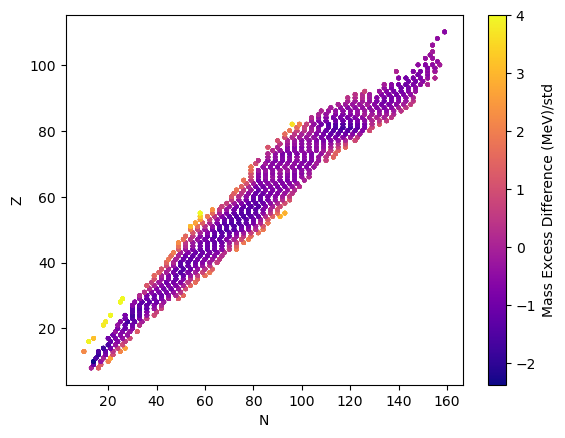

In [39]:
# Plot the mass excess difference across the nuclear landscape
diff_o_std = result['Difference']/std_difference
v_min, v_max = -4, 4

plt.scatter(result['N'], result['Z'], c=np.clip(diff_o_std, v_min, v_max), cmap='plasma', s=5)

plt.colorbar(label='Mass Excess Difference (MeV)/std')
plt.xlabel('N')
plt.ylabel('Z')

Text(0, 0.5, 'log_10(Val_Loss)')

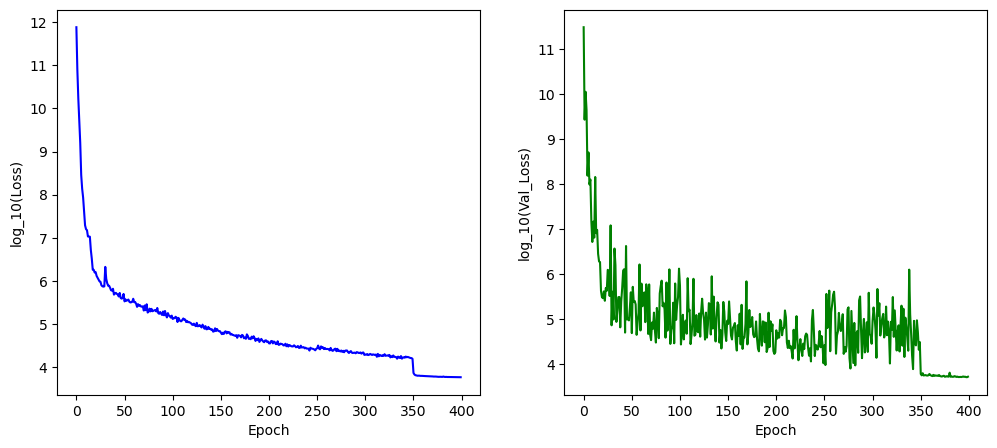

In [40]:
# Loss analyisis
# Combine the loss from several steps
loss_dir = DATA_DIR/'training'/'loss' 
loss_file = [loss_dir/f'{result_name}.batch={batches[i]}.epoch={epochs[i]}.stage{i+1}.loss.dat' for i in range(3)]
val_loss_file = [loss_dir/f'{result_name}.batch={batches[i]}.epoch={epochs[i]}.stage{i+1}.val_loss.dat' for i in range(3)]

loss_data = [np.loadtxt(file) for file in loss_file]
val_loss_data = [np.loadtxt(file) for file in val_loss_file]

loss_arr = [item for sublist in loss_data for item in sublist]
val_loss_arr = [item for sublist in val_loss_data for item in sublist]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(np.log(loss_arr), label='loss', color='blue')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('log_10(Loss)')

axes[1].plot(np.log(val_loss_arr), label='cos(x)', color='green')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('log_10(Val_Loss)')